In [1]:
from model_evaluate import evaluate_model

In [2]:
# Step 1: Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Step 2: Load the saved training and testing data
train_data = pd.read_csv("train_multi_output.csv")
test_data = pd.read_csv("test_multi_output.csv")

# Step 3: Separate features (X) and target variables (y)
X_train = train_data[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Wind_speed', 'Humidity', 'Temperature']]
y_train = train_data[['PV_production', 'Wind_production']]

X_test = test_data[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Wind_speed', 'Humidity', 'Temperature']]
y_test = test_data[['PV_production', 'Wind_production']]

In [3]:
# Step 5: Initialize and train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,       # number of trees (try 100-500)
    max_depth=None,         # let trees expand fully
    random_state=42,
    n_jobs=-1               # use all CPU cores for faster training
)

rf_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = rf_model.predict(X_test)

--- Random Forest - PV Production ---
MAE: 198.833
MSE: 239883.114
RMSE: 489.779
R²: 0.983
Adjusted R²: 0.983
Explained Variance: 0.983
Sample Size: 11664
Visualization Sample: 5,000 points


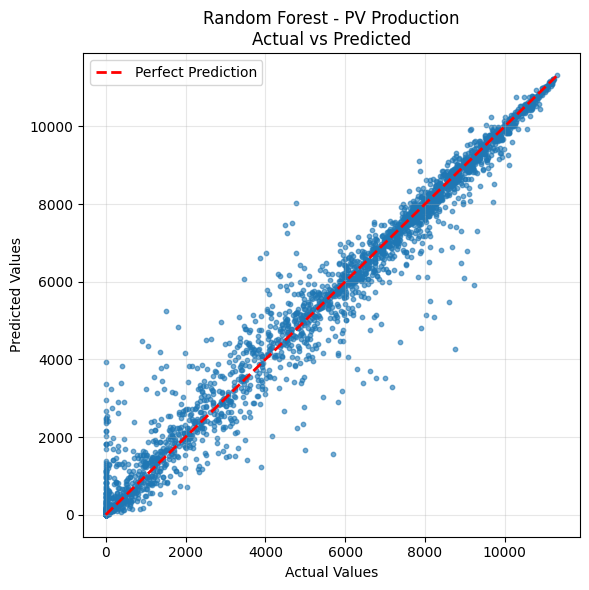

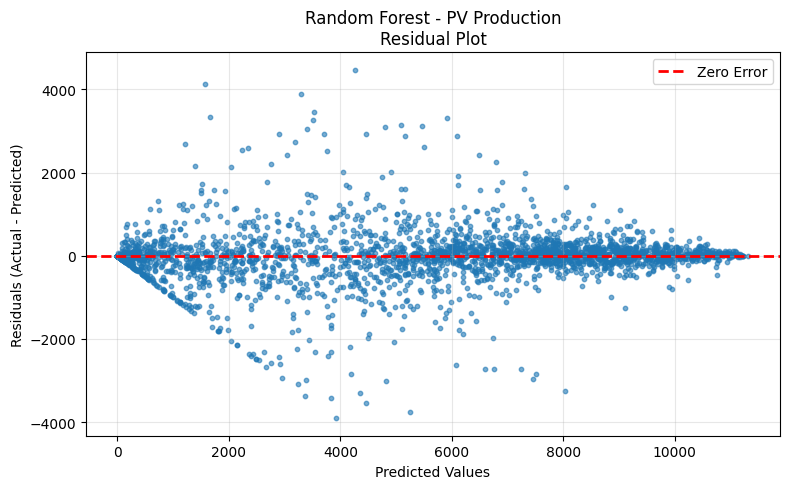

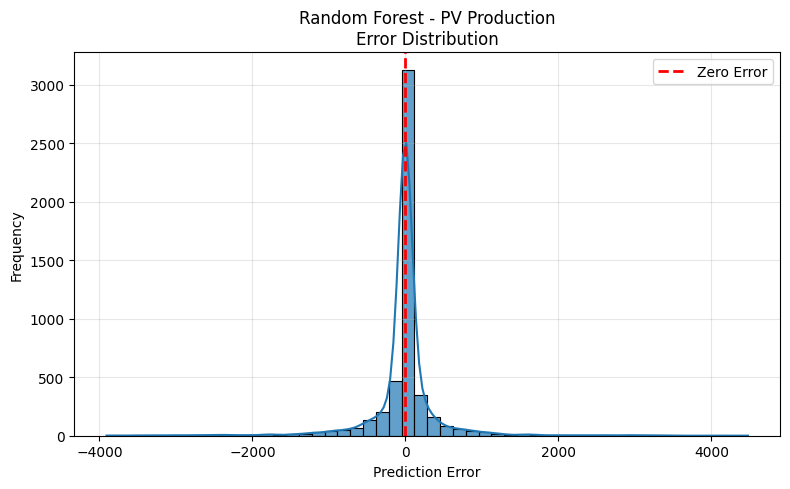

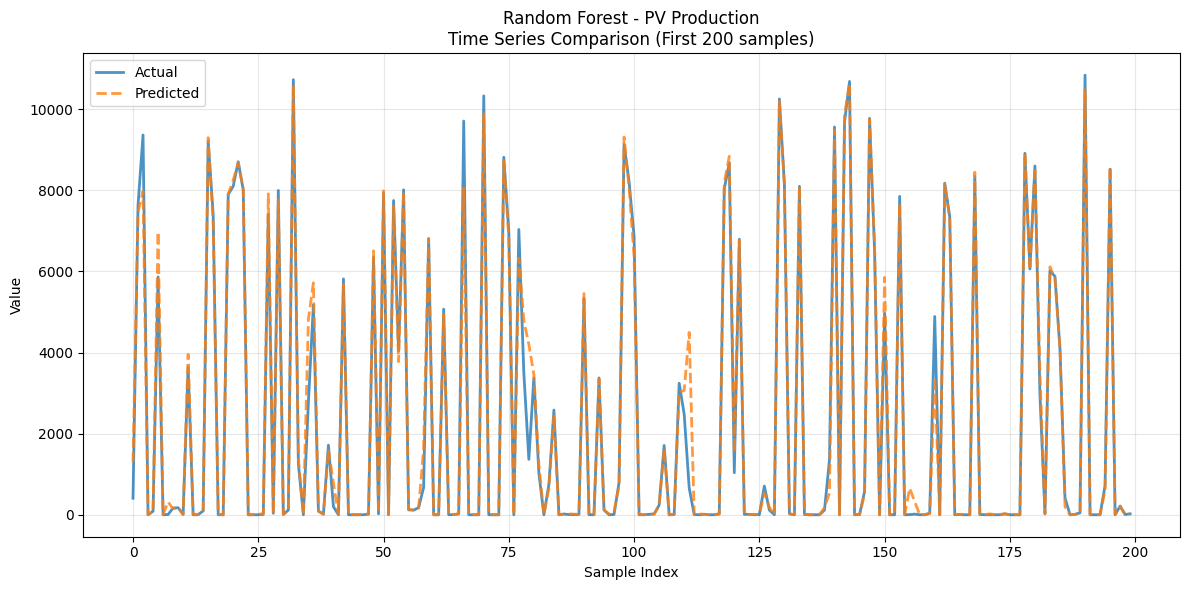

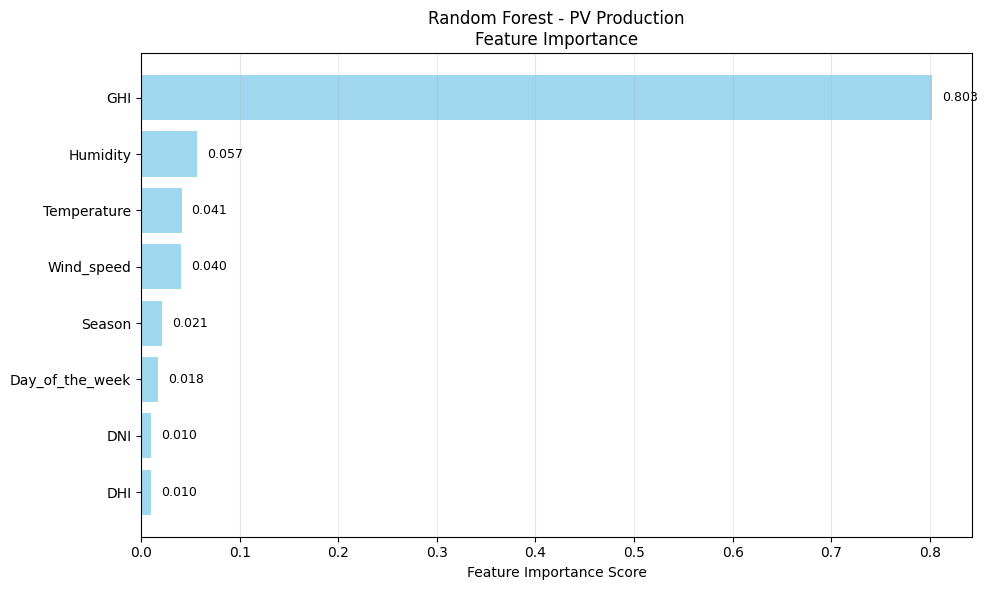


Top Features for PV Production:
           Feature  Importance
4              GHI    0.802507
6         Humidity    0.056534
7      Temperature    0.041035
5       Wind_speed    0.040486
0           Season    0.021460
1  Day_of_the_week    0.017610
3              DNI    0.010362
2              DHI    0.010006
--- Random Forest - Wind Production ---
MAE: 142.200
MSE: 76619.211
RMSE: 276.802
R²: 0.946
Adjusted R²: 0.946
Explained Variance: 0.946
Sample Size: 11664
Visualization Sample: 5,000 points


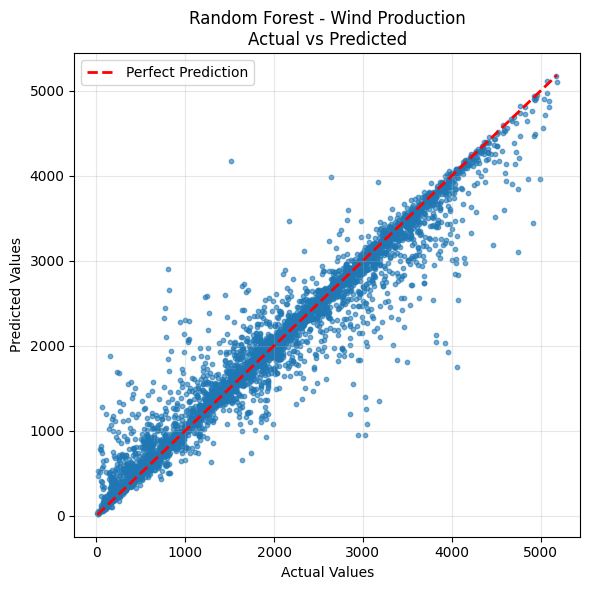

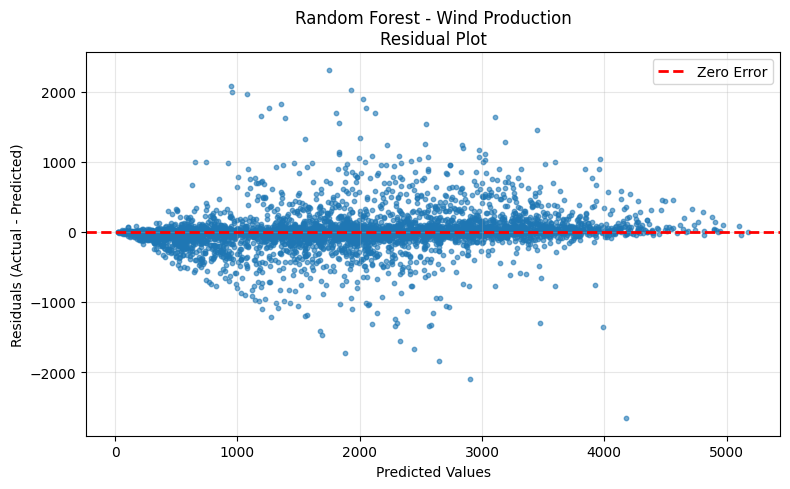

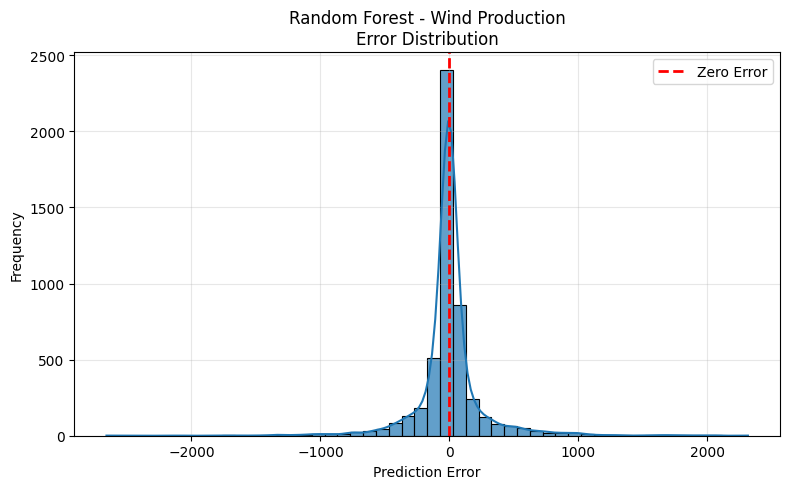

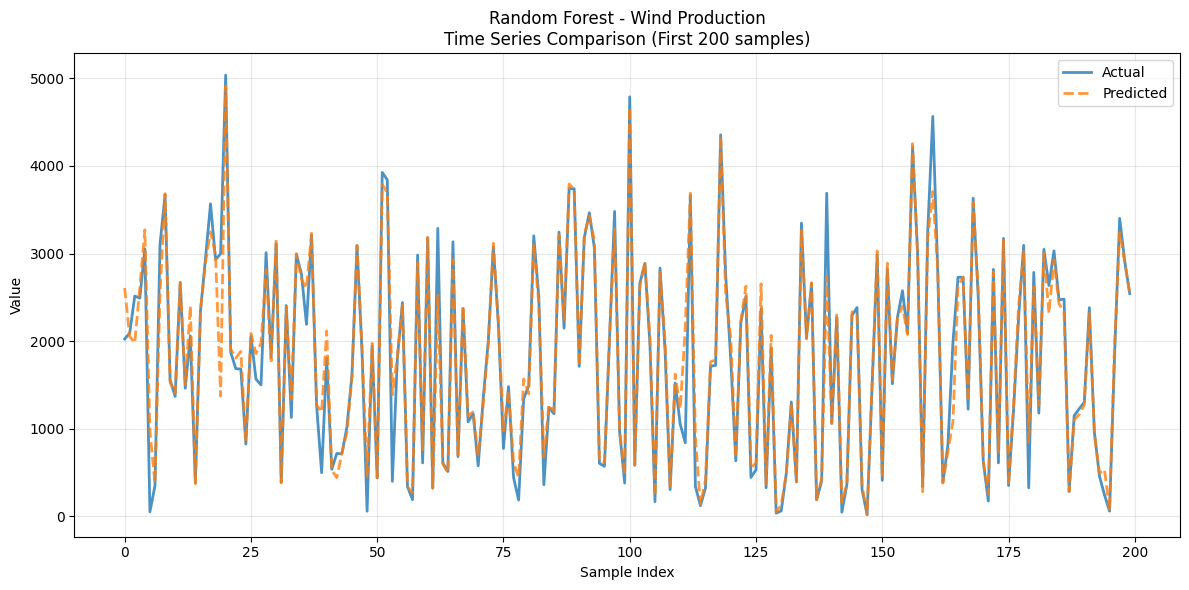

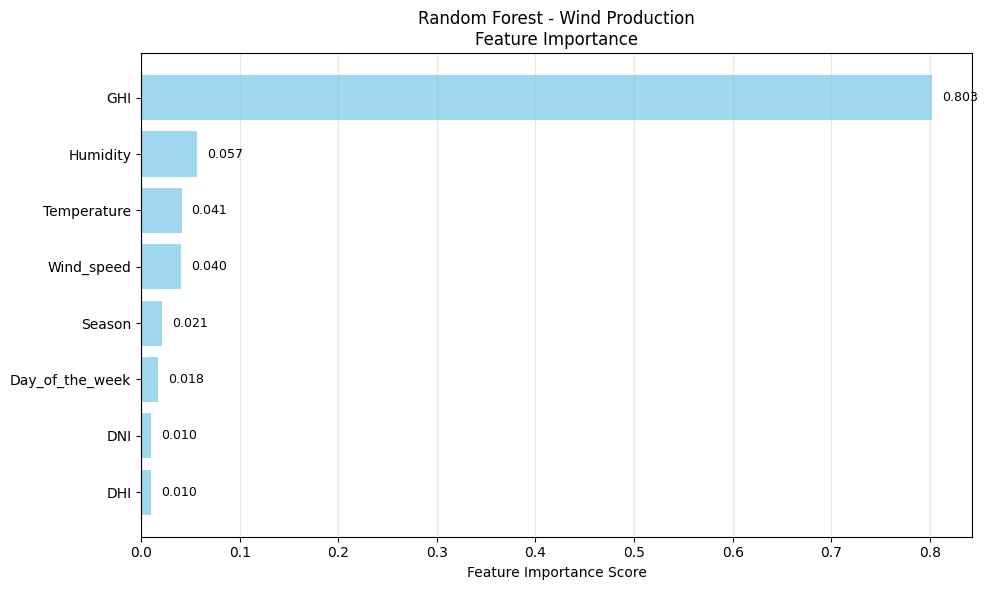


Top Features for Wind Production:
           Feature  Importance
4              GHI    0.802507
6         Humidity    0.056534
7      Temperature    0.041035
5       Wind_speed    0.040486
0           Season    0.021460
1  Day_of_the_week    0.017610
3              DNI    0.010362
2              DHI    0.010006


{'mae': np.float64(142.19990282076844),
 'mse': np.float64(76619.21082088783),
 'rmse': np.float64(276.80175364489264),
 'r2': 0.9458185602562766,
 'adj_r2': 0.9457813700788463,
 'explained_variance': 0.945822422969916}

In [4]:
evaluate_model(y_test['PV_production'], rf_model.predict(X_test)[:,0], "Random Forest", "PV Production", X_train.columns, rf_model)
evaluate_model(y_test['Wind_production'], rf_model.predict(X_test)[:,1], "Random Forest", "Wind Production", X_train.columns, rf_model)